<a href="https://colab.research.google.com/github/paulo-generozo/paulo-generozo/blob/main/SIMPLE_PERCEPTRON_WITH_NUMPY_RANDOM_ARRAYS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron Simples com Visualização

Este código implementa e visualiza o algoritmo Perceptron, um dos modelos mais fundamentais de aprendizado de máquina, para classificação binária de dados linearmente separáveis.

## 📋 Resumo do Código

1. **Geração de Dados Aleatórios**:
   - Cria um conjunto de dados artificial linearmente separável em 2D
   - Gera uma linha de decisão aleatória para separar duas classes (0 e 1)

2. **Implementação do Perceptron**:
   - Inicializa pesos e bias aleatoriamente
   - Atualiza os parâmetros usando a regra de aprendizado do Perceptron
   - Inclui critério de parada quando atinge 100% de acurácia

3. **Visualização**:
   - Mostra lado a lado:
     - Os dados originais com a fronteira real (verde)
     - A solução encontrada pelo Perceptron (fronteira preta tracejada)
   - Exibe os parâmetros aprendidos e os reais para comparação

## 🧠 Conceitos-Chave Implementados

- **Função de Ativação Degrau**: `1 if np.dot(weights, x) + bias >= 0 else 0`
- **Regra de Aprendizado**: Atualização dos pesos quando há erro de classificação
- **Teorema da Convergência**: Garantia de convergência para dados linearmente separáveis

## 🛠️ Como Usar

1. Execute o código (requer NumPy e Matplotlib)
2. Observe:
   - A classificação inicial (gráfico esquerdo)
   - A solução encontrada (gráfico direito)
   - As estatísticas de treinamento no console

## 📊 Saída Esperada

- Dois gráficos comparando a separação real e a aprendida
- Número de épocas necessárias para convergência
- Valores finais dos pesos e bias

## ⚙️ Personalização

Altere estas variáveis para experimentar:
- `num_samples`: Número de pontos de dados
- `learning_rate`: Taxa de aprendizado
- Valores iniciais dos pesos e bias

## 📚 Fundamentos Teóricos

O Perceptron demonstra:
- Aprendizado supervisionado
- Classificação linear
- Ajuste iterativo de parâmetros
- Capacidade de resolver problemas linearmente separáveis

Ideal para entender os fundamentos de redes neurais e algoritmos de aprendizado de máquina!

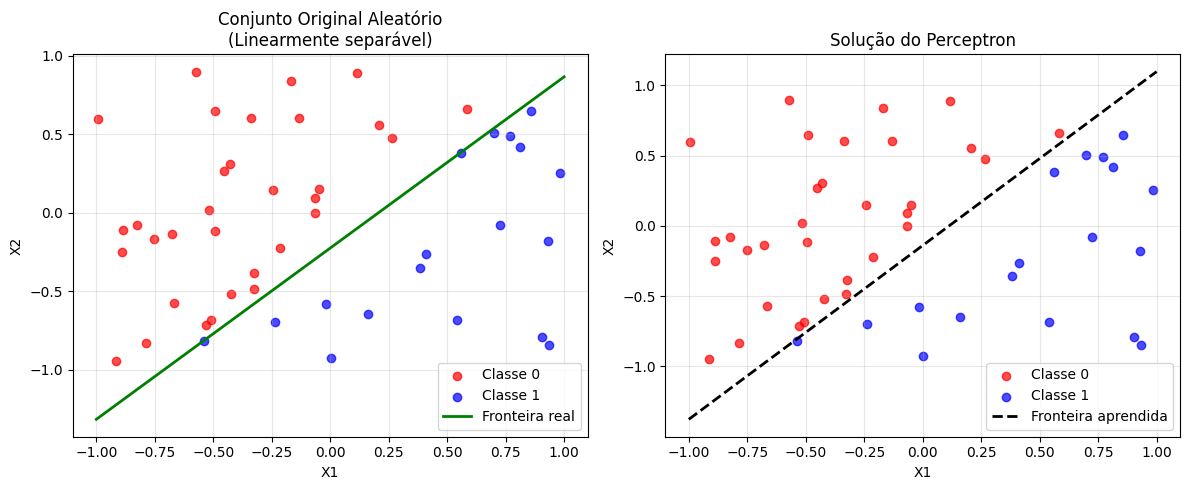

Treinamento concluído em 7 épocas
Pesos finais: [ 0.4001 -0.3235]
Bias final: -0.045

Parâmetros reais usados para gerar os dados:
Pesos reais: [ 0.9368 -0.8595]
Bias real: -0.1933


In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Configuração
np.random.seed(None)  # Remove a seed fixa para total aleatoriedade
num_samples = 50
learning_rate = 0.1

# 1. Gera dados verdadeiramente aleatórios e linearmente separáveis
while True:
    # Gera pontos aleatórios
    X = np.random.rand(num_samples, 2) * 2 - 1

    # Gera uma linha de separação aleatória
    sep_weights = np.random.rand(2) * 2 - 1
    sep_bias = np.random.rand() * 2 - 1

    # Classifica os pontos
    y = np.array([1 if np.dot(sep_weights, x) + sep_bias >= 0 else 0 for x in X])

    # Verifica se os dados são linearmente separáveis
    if len(np.unique(y)) == 2:  # Temos ambas as classes
        break

# 2. Mostra o conjunto original com a fronteira real
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[y==0][:,0], X[y==0][:,1], c='red', label='Classe 0', alpha=0.7)
plt.scatter(X[y==1][:,0], X[y==1][:,1], c='blue', label='Classe 1', alpha=0.7)
x_vals = np.array([-1, 1])
y_vals = (-sep_weights[0] * x_vals - sep_bias) / sep_weights[1]
plt.plot(x_vals, y_vals, 'g-', linewidth=2, label='Fronteira real')
plt.title('Conjunto Original Aleatório\n(Linearmente separável)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Treina o perceptron
weights = np.random.rand(2) * 2 - 1
bias = np.random.rand() * 2 - 1

for epoch in range(100):  # Número máximo de épocas
    errors = 0
    for xi, target in zip(X, y):
        prediction = 1 if np.dot(weights, xi) + bias >= 0 else 0
        error = target - prediction
        if error != 0:
            weights += learning_rate * error * xi
            bias += learning_rate * error
            errors += 1
    if errors == 0:
        break

# 4. Mostra o resultado final
plt.subplot(1, 2, 2)
plt.scatter(X[y==0][:,0], X[y==0][:,1], c='red', label='Classe 0', alpha=0.7)
plt.scatter(X[y==1][:,0], X[y==1][:,1], c='blue', label='Classe 1', alpha=0.7)
y_vals = (-weights[0] * x_vals - bias) / weights[1]
plt.plot(x_vals, y_vals, 'k--', linewidth=2, label='Fronteira aprendida')
plt.title('Solução do Perceptron')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Treinamento concluído em {epoch+1} épocas")
print(f"Pesos finais: {np.round(weights, 4)}")
print(f"Bias final: {round(bias, 4)}")
print(f"\nParâmetros reais usados para gerar os dados:")
print(f"Pesos reais: {np.round(sep_weights, 4)}")
print(f"Bias real: {round(sep_bias, 4)}")